# Predictive Analysis -Group Traveler Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as pyplot
%matplotlib inline
from sklearn.metrics import mean_squared_error
import random
import itertools
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
#plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
import math

In [2]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller, kpss

In [4]:
data = pd.read_csv('data\allData.csv')


In [5]:
len(data)

153

imported count of group and solo travelers and converted the date format from string to date

In [6]:
data['Date'] = pd.to_datetime(data['Date'])

In [7]:
data.head()

Solo  Group       Date
0  1852    240 2019-08-01
1  1100    503 2019-08-02
2  1491    267 2019-08-03
3  1434    128 2019-08-04
4  1054    612 2019-08-05

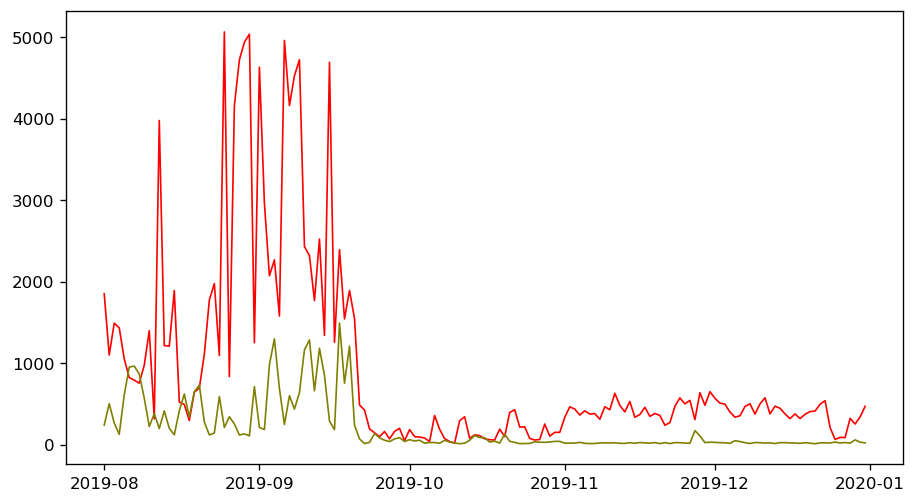

In [29]:
plt.plot( 'Date', 'Solo', data=data, marker='',  color='red', linewidth=1)
plt.plot( 'Date', 'Group', data=data, marker='', color='olive', linewidth=1)

plt.show()

Taking data of group traverers count. Also after having applied the ARIMA model initially, noticed that the dates being predicted are negative values. Also given data is non-stationary causing impact on the ARIMA model. To avoid that situation, we have considered the logarithmic values of all data.

In [8]:


group_data = np.log(data[['Group']].copy())
group_data

Group
0    5.480639
1    6.220590
2    5.587249
3    4.852030
4    6.416732
..        ...
148  3.295837
149  2.944439
150  4.094345
151  3.433987
152  3.135494

[153 rows x 1 columns]

## ARIMA MODEL : Group Data

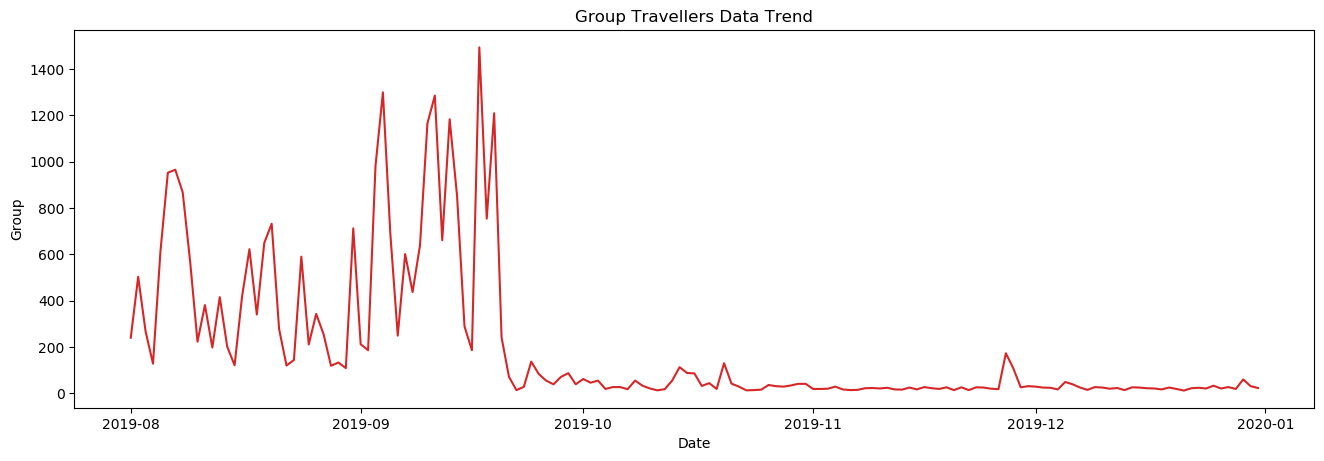

In [12]:
def plot_df(data, x, y, title="", xlabel='Date', ylabel='Group', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(data, y=data['Group'], x=data['Date'], title='Group Travellers Data Trend')

In [10]:
X=np.array(group_data['Group'])
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
# finding the optimal set of parameters that yields the best performance for the model
# p,d,q : parameters for seasonality, trend and noise
d =q=  range(0, 2)
p= range(0,20)
pdq = list(itertools.product(p, d, q))
final_aic =float('inf')
final_pqd = (0,0,0)
for param in pdq:
    predictions = list()
    #for t in range(len(test)):
    model = ARIMA(history, order=param)
    #model = ARIMA(np.array(group_data['Group']),order=param)
    model_fit = model.fit(disp=0)
    #output = model_fit.forecast()
    #yhat = output[0]
    #predictions.append(yhat)
    #obs = test[t]
    #history.append(obs)
    #print('predicted=%f, expected=%f' % (yhat, obs))
    print('ARIMA{} - AIC: {}'.format(param, model_fit.aic))
    if model_fit.aic < final_aic:
        final_aic = model_fit.aic
        final_pqd = param


ARIMA(0, 0, 0) - AIC: 358.86326722278
ARIMA(0, 0, 1) - AIC: 295.3076587078732
ARIMA(0, 1, 0) - AIC: 234.99921771941052
ARIMA(0, 1, 1) - AIC: 230.4675101368136
ARIMA(1, 0, 0) - AIC: 232.83660931934344
ARIMA(1, 0, 1) - AIC: 232.79296870846815
ARIMA(1, 1, 0) - AIC: 233.686335693525
ARIMA(1, 1, 1) - AIC: 223.27556750594636
ARIMA(2, 0, 0) - AIC: 233.61461594906868
ARIMA(2, 0, 1) - AIC: 229.37912691140608
ARIMA(2, 1, 0) - AIC: 232.2261875682388
ARIMA(2, 1, 1) - AIC: 224.55010165614925
ARIMA(3, 0, 0) - AIC: 233.8558582983503
ARIMA(3, 0, 1) - AIC: 230.2769474183488
ARIMA(3, 1, 0) - AIC: 227.16063232360324
ARIMA(3, 1, 1) - AIC: 225.450545052961
ARIMA(4, 0, 0) - AIC: 230.56541822073905
ARIMA(4, 0, 1) - AIC: 230.74103910055848
ARIMA(4, 1, 0) - AIC: 228.02306077495544
ARIMA(4, 1, 1) - AIC: 227.4056626043498
ARIMA(5, 0, 0) - AIC: 231.96343625218316
ARIMA(5, 0, 1) - AIC: 232.73887955401509
ARIMA(5, 1, 0) - AIC: 227.20529790719837
ARIMA(5, 1, 1) - AIC: 228.40787853621111
ARIMA(6, 0, 0) - AIC: 232.021

In [14]:
print("Best AIC results:", final_aic," obtained at :", final_pqd )


Best AIC results: 223.27556750594636  obtained at : (1, 1, 1)


In [15]:
size

100

predicted=2.983038, expected=3.135494
predicted=3.034542, expected=3.044522
predicted=2.955129, expected=3.178054
predicted=3.045488, expected=2.833213
predicted=2.819789, expected=2.772589
predicted=2.767144, expected=3.218876
predicted=3.042973, expected=2.833213
predicted=2.802920, expected=3.295837
predicted=3.092404, expected=3.091042
predicted=2.974987, expected=2.944439
predicted=2.882492, expected=3.258097
predicted=3.081117, expected=2.639057
predicted=2.692254, expected=3.258097
predicted=3.069632, expected=2.639057
predicted=2.687432, expected=3.258097
predicted=3.060824, expected=3.218876
predicted=3.053082, expected=2.995732
predicted=2.923150, expected=2.890372
predicted=2.853530, expected=5.153292
predicted=4.279479, expected=4.682131
predicted=4.142019, expected=3.258097
predicted=3.292646, expected=3.433987
predicted=3.390967, expected=3.367296
predicted=3.344274, expected=3.218876
predicted=3.241347, expected=3.178054
predicted=3.199762, expected=2.833213
predicted=2.

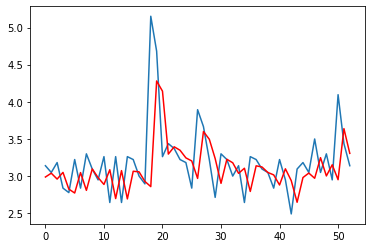

In [13]:
X=np.array(group_data['Group'])
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]

predictions = list()
for t in range(len(test)):
    #model = ARIMA(history, order=param)
    model = ARIMA(history,order=final_pqd) # applying the optimal parameters to get the final results
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))


error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
print('Test RMSE: %.3f' % math.sqrt(error))
print("data range:",max(group_data['Group'])-min(group_data['Group']))
print("data average:",np.mean(group_data['Group']))
#plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

In [16]:
model_fit.summary() # extracting summary of the fitted model

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                  151
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -148.543
Method:                       css-mle   S.D. of innovations              0.646
Date:                Tue, 12 May 2020   AIC                            305.085
Time:                        10:54:58   BIC                            317.154
Sample:                             1   HQIC                           309.988
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0178      0.016     -1.141      0.254      -0.048       0.013
ar.L1.D.y      0.4347      0.120      3.627      0.000       0.200       0.670
ma.L1.D.y     -0.8377      0.076    -11.090      0.000      -0.986      -0.690
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.3007           +0.0000j            2.3007            0.0000
MA.1            1.1938           +0.0000j            1.1938            0.0000
-----------------------------------------------------------------------------
"""

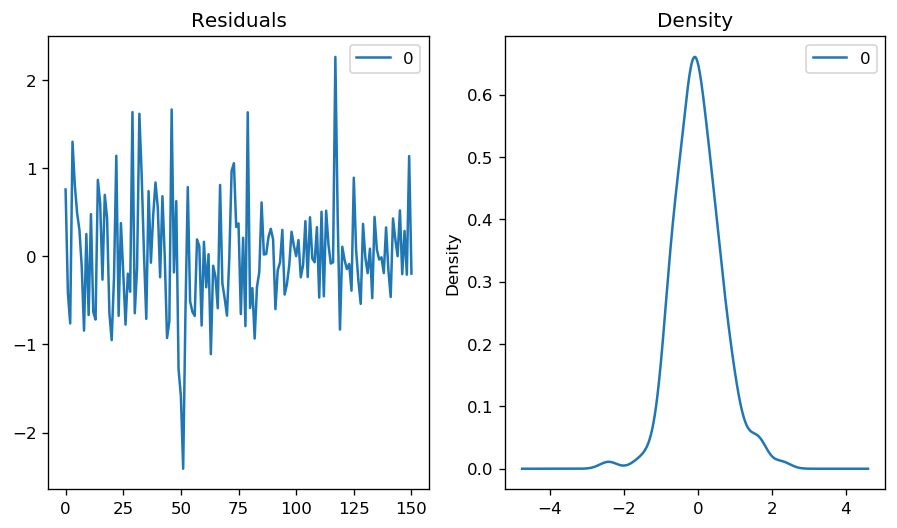

In [76]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

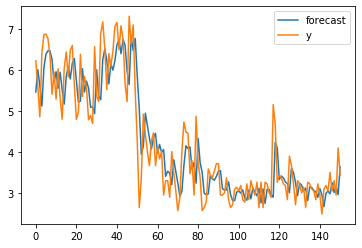

In [17]:
# Actual vs Fitted
model_fit.plot_predict(dynamic=False)
plt.show()

### Consolidated Results of ARIMA Model

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  152
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -149.056
Method:                       css-mle   S.D. of innovations              0.644
Date:                Tue, 12 May 2020   AIC                            306.112
Time:                        10:59:40   BIC                            318.207
Sample:                             1   HQIC                           311.026
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0182      0.015     -1.181      0.237      -0.048       0.012
ar.L1.D.y      0.4359      0.119      3.658      0.000       0.202       0.670
ma.L1.D.y     -0.8392      0.075    -11.233      0.0

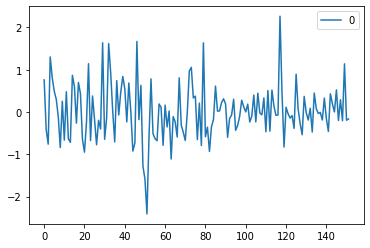

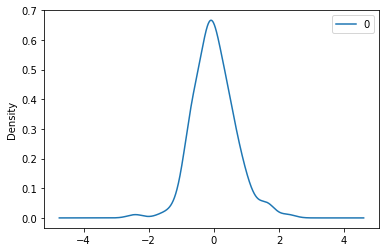

                0
count  152.000000
mean     0.006054
std      0.647516
min     -2.409811
25%     -0.405381
50%     -0.052694
75%      0.375711
max      2.263845
predicted=2.983038, expected=3.135494
predicted=3.034542, expected=3.044522
predicted=2.955129, expected=3.178054
predicted=3.045488, expected=2.833213
predicted=2.819789, expected=2.772589
predicted=2.767144, expected=3.218876
predicted=3.042973, expected=2.833213
predicted=2.802920, expected=3.295837
predicted=3.092404, expected=3.091042
predicted=2.974987, expected=2.944439
predicted=2.882492, expected=3.258097
predicted=3.081117, expected=2.639057
predicted=2.692254, expected=3.258097
predicted=3.069632, expected=2.639057
predicted=2.687432, expected=3.258097
predicted=3.060824, expected=3.218876
predicted=3.053082, expected=2.995732
predicted=2.923150, expected=2.890372
predicted=2.853530, expected=5.153292
predicted=4.279479, expected=4.682131
predicted=4.142019, expected=3.258097
predicted=3.292646, expected=3.433987
pr

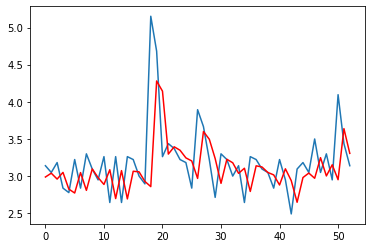

In [18]:
model = ARIMA(np.array(group_data['Group']), order=final_pqd)
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())
X=np.array(group_data['Group'])
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=final_pqd)
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

#### Checking the stationary nature of our data

In [19]:
# ADF Test
result = adfuller(np.array(group_data['Group']), autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -1.5477809027008835
p-value: 0.5097564735287118
Critial Values:
   1%, -3.4759527332353084
Critial Values:
   5%, -2.881548071241103
Critial Values:
   10%, -2.577438765246763


In [20]:
# KPSS Test
result = kpss(np.array(group_data['Group']), regression='c')
print('\nKPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[3].items():
    print('Critial Values:')
    print(f'   {key}, {value}')


KPSS Statistic: 0.897249
p-value: 0.010000
Critial Values:
   10%, 0.347
Critial Values:
   5%, 0.463
Critial Values:
   2.5%, 0.574
Critial Values:
   1%, 0.739


D:\Anaconda\lib\site-packages\statsmodels\tsa\stattools.py:1685: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


null hypothesis : time series possesses a unit root and is non-stationary

p-value in ADF Test : 0.28 


if the P-Value in ADH test is less than the significance level (1), you reject the null hypothesis.


=> given data is non-stationary.

Need to de-trend the data using logarithmic values

#### Checking for Data Seasonility ::

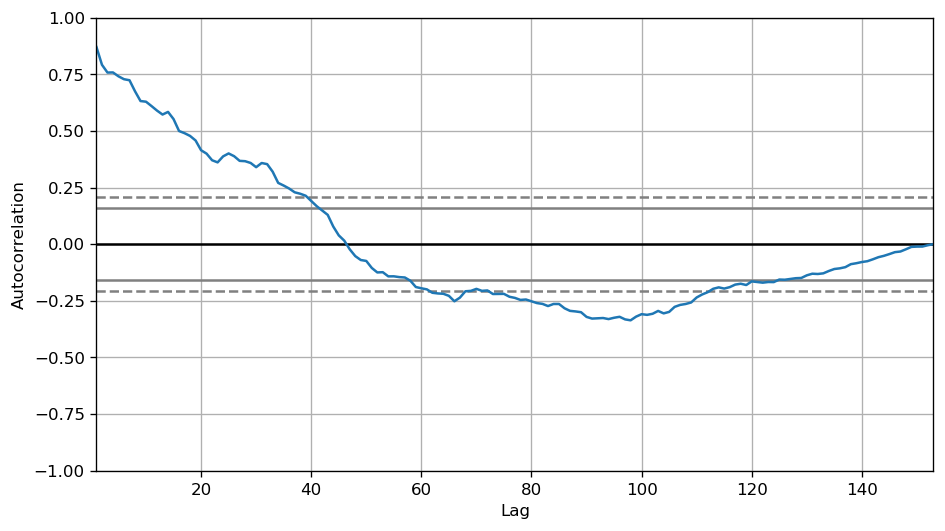

In [21]:
from pandas.plotting import autocorrelation_plot


# Draw Plot
plt.rcParams.update({'figure.figsize':(9,5), 'figure.dpi':120})
autocorrelation_plot(np.array(group_data['Group']).tolist())

No Seasonality trend observed in the whole data

### Forecasting for future

In [30]:
model_fit.predict(start =101,end=153 )

array([-9.23209918e-02, -5.07474734e-02, -1.06400726e-01,  3.97714181e-02,
        4.76726667e-02, -1.50002156e-01,  1.96994983e-02, -1.80018421e-01,
       -7.83370942e-02, -1.66130501e-02, -1.50400883e-01,  1.13420034e-01,
       -1.64549072e-01,  1.01568448e-01, -1.74476851e-01, -1.40423898e-01,
       -3.77747514e-02,  7.43446567e-04, -9.21445536e-01, -5.92062431e-01,
        6.78771420e-02, -2.41032970e-02, -3.38859604e-03,  4.69015344e-02,
        4.56646136e-02,  1.67152772e-01, -2.96691299e-01, -1.66614601e-01,
        2.95710127e-02,  2.20566218e-01, -6.22001046e-02, -3.11625054e-02,
        5.37508008e-02, -2.13761303e-02,  1.72090173e-01, -1.15402556e-01,
       -9.09388295e-02, -3.47338610e-02, -2.04229342e-02,  5.79775975e-02,
       -1.16937283e-01,  2.57141705e-03,  1.77277313e-01, -1.05857139e-01,
       -1.33816415e-01, -6.83549552e-02, -2.49492004e-01, -3.69115917e-02,
       -1.42279192e-01,  1.23596560e-02, -4.63152446e-01, -1.31912302e-01,
       -6.74124463e-02])

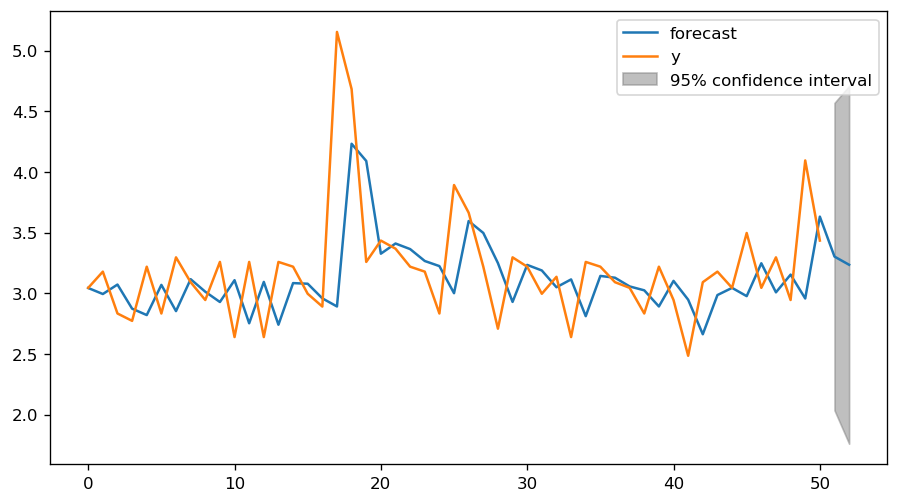

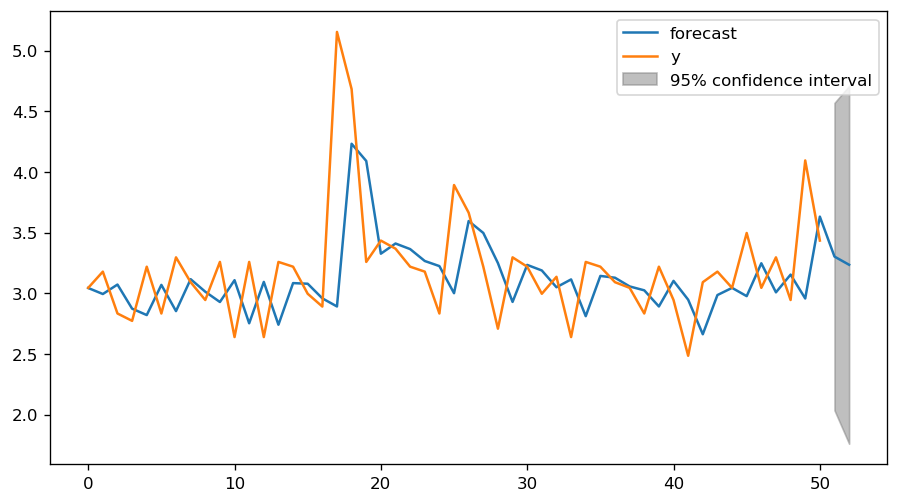

In [31]:
model_fit.plot_predict(start=101,end=153)

#### Forecast for the next 30 days

In [24]:
forecasted_group_data = np.array(model_fit.forecast(steps=30)[0])
forecasted_group_data

array([3.3020749 , 3.23466246, 3.19528547, 3.16809434, 3.14619992,
       3.12660776, 3.1080163 , 3.0898598 , 3.07189236, 3.05400709,
       3.03615755, 3.01832353, 3.00049626, 2.98267192, 2.96484886,
       2.94702635, 2.92920409, 2.91138192, 2.89355981, 2.87573771,
       2.85791562, 2.84009354, 2.82227145, 2.80444937, 2.78662729,
       2.76880521, 2.75098312, 2.73316104, 2.71533896, 2.69751688])

#### Converting logarithmic predictions to integer values by taking a exponential value -1

In [25]:
temp =np.ceil(np.exp(forecasted_group_data)-1)
forecasted_group_January =[]
for x in temp:
    forecasted_group_January.append(int(x))
    #print(int(x))

In [26]:
forecasted_group_January

[27,
 25,
 24,
 23,
 23,
 22,
 22,
 21,
 21,
 21,
 20,
 20,
 20,
 19,
 19,
 19,
 18,
 18,
 18,
 17,
 17,
 17,
 16,
 16,
 16,
 15,
 15,
 15,
 15,
 14]

Considered other models, but the mean of these models is varies from 0 hugely and hence is not ideal for our data

## AR MODEL : Group Data

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                  153
Model:                     AutoReg(1)   Log Likelihood                -161.678
Method:               Conditional MLE   S.D. of innovations              0.701
Date:                Tue, 12 May 2020   AIC                             -0.671
Time:                        11:01:23   BIC                             -0.611
Sample:                             1   HQIC                            -0.647
                                  153                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
trend          0.0008      0.001      0.923      0.356      -0.001       0.003
y.L1           0.9725      0.018     54.225      0.000       0.937       1.008
                                    Roots           

                0
count  152.000000
mean     0.036766
std      0.702334
min     -1.550586
25%     -0.432591
50%     -0.072382
75%      0.418599
max      2.243354
predicted=3.312448, expected=3.135494
predicted=3.346328, expected=3.044522
predicted=3.261075, expected=3.178054
predicted=3.374157, expected=2.833213
predicted=3.064117, expected=2.772589
predicted=3.003829, expected=3.218876
predicted=3.396191, expected=2.833213
predicted=3.049788, expected=3.295837
predicted=3.457399, expected=3.091042
predicted=3.272756, expected=2.944439
predicted=3.138353, expected=3.258097
predicted=3.414314, expected=2.639057
predicted=2.858792, expected=3.258097
predicted=3.409177, expected=2.639057
predicted=2.853656, expected=3.258097
predicted=3.404430, expected=3.218876
predicted=3.367213, expected=2.995732
predicted=3.165659, expected=2.890372
predicted=3.068106, expected=5.153292
predicted=5.065548, expected=4.682131
predicted=4.654571, expected=3.258097
predicted=3.413399, expected=3.433987
pr

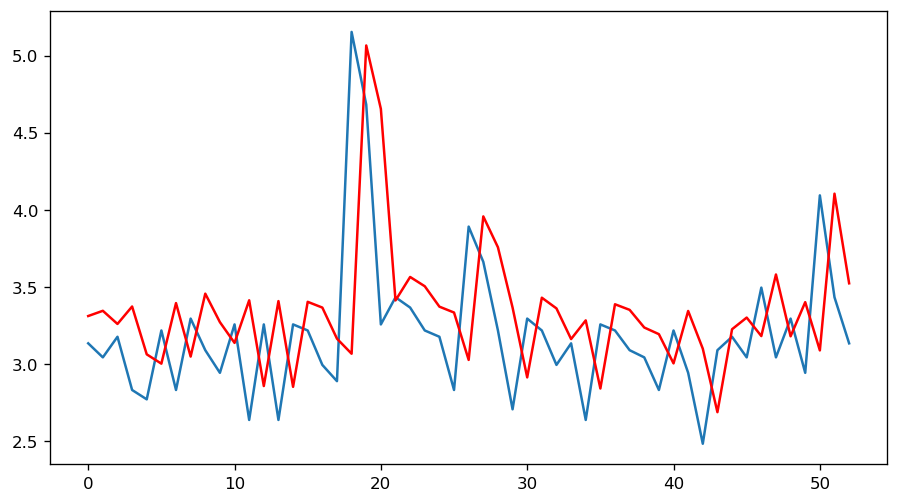

In [27]:
# AR example
from statsmodels.tsa.ar_model import AutoReg
from random import random
# contrived dataset

# fit model
model_ar = AutoReg(np.array(group_data['Group']), lags=1,trend='t')
model_fit_ar = model_ar.fit()
print(model_fit_ar.summary())
# plot residual errors
residuals = pd.DataFrame(model_fit_ar.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())
X=np.array(group_data['Group'])
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model_ar = AutoReg(history, lags=1)
    model_fit_ar = model_ar.fit()
    output = model_fit_ar.predict(len(data), len(data))
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

## MA MODEL : Group Data

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                  152
Model:                     AutoReg(1)   Log Likelihood                -157.153
Method:               Conditional MLE   S.D. of innovations              0.685
Date:                Tue, 12 May 2020   AIC                             -0.717
Time:                        11:02:33   BIC                             -0.657
Sample:                             1   HQIC                            -0.692
                                  152                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.5276      0.177      2.983      0.003       0.181       0.874
y.L1           0.8727      0.039     22.099      0.000       0.795       0.950
                                    Roots           

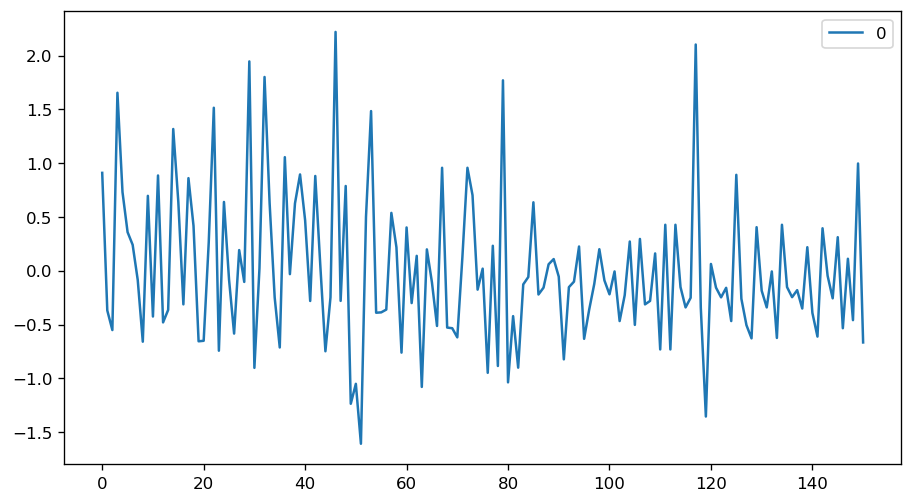

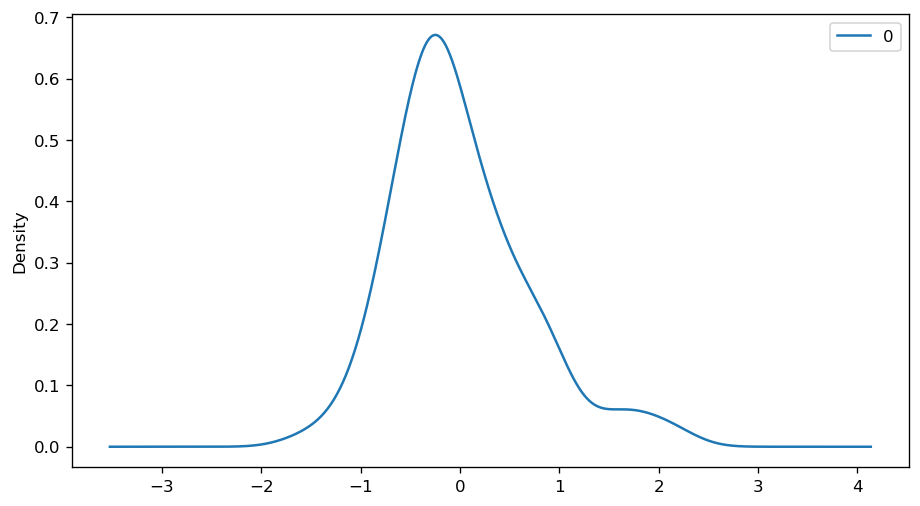

                  0
count  1.510000e+02
mean  -1.638130e-15
std    6.873789e-01
min   -1.608605e+00
25%   -4.425496e-01
50%   -1.520827e-01
75%    3.769375e-01
max    2.220407e+00
predicted=3.524459, expected=3.135494
predicted=3.524459, expected=3.044522
predicted=3.524459, expected=3.178054
predicted=3.524459, expected=2.833213
predicted=3.524459, expected=2.772589
predicted=3.524459, expected=3.218876
predicted=3.524459, expected=2.833213
predicted=3.524459, expected=3.295837
predicted=3.524459, expected=3.091042
predicted=3.524459, expected=2.944439
predicted=3.524459, expected=3.258097
predicted=3.524459, expected=2.639057
predicted=3.524459, expected=3.258097
predicted=3.524459, expected=2.639057
predicted=3.524459, expected=3.258097
predicted=3.524459, expected=3.218876
predicted=3.524459, expected=2.995732
predicted=3.524459, expected=2.890372
predicted=3.524459, expected=5.153292
predicted=3.524459, expected=4.682131
predicted=3.524459, expected=3.258097
predicted=3.524459, ex

In [28]:
from statsmodels.tsa.arima_model import ARMA
from random import random

# fit model
model_arma = ARMA(np.array(group_data['Group']),order=(0, 1) )
model_fit_arma = model_ar.fit()
print(model_fit_ar.summary())
# plot residual errors
residuals = pd.DataFrame(model_fit_ar.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())
X=np.array(group_data['Group'])
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model_arma = ARMA(history, order=(0, 1))
    model_fit_arma = model_arma.fit()
    output = model_fit_ar.predict(len(data), len(data))
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()